Coefficients (true, Linear regression, RANSAC regression):
82.1903908407869 [97.60679623] [82.24756071]


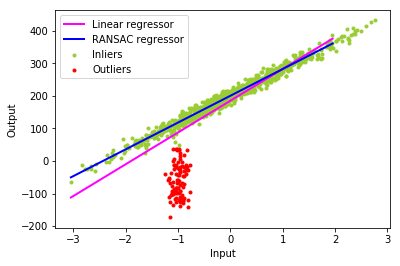

In [ ]:
# Ransac Regressor & Linear Regressor
# @author: ALI GHANBARI
# @email: alighanbari446@gmail.com

import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets


N_Samples = 1000;
N_Outliers = 100;
aX = -1;  bX = 0.1;
aY = -60;  bY = 50;

dataX, dataY, Coef = datasets.make_regression(n_samples=N_Samples, n_features=1,
                           n_informative=1, noise=12, coef=True, random_state=0, bias=200.0)

np.random.seed(0)
dataX[:N_Outliers] = aX + bX * np.random.normal(size=(N_Outliers, 1))
dataY[:N_Outliers] = aY + bY * np.random.normal(size=N_Outliers)

Linear = linear_model.LinearRegression()
Linear.fit(dataX, dataY)

Ransac = linear_model.RANSACRegressor()
Ransac.fit(dataX, dataY)
Inlier = Ransac.inlier_mask_
Outlier = (Inlier == False)

lineX = np.arange(dataX.min(), dataX.max())[:, np.newaxis]
lineY_Linear = Linear.predict(lineX)
lineY_Ransac = Ransac.predict(lineX)

print("Coefficients (true, Linear regression, RANSAC regression):")
print(Coef, Linear.coef_, Ransac.estimator_.coef_)

plt.scatter(dataX[Inlier], dataY[Inlier], color='yellowgreen', marker='.', label='Inliers')
plt.scatter(dataX[Outlier], dataY[Outlier], color='red', marker='.', label='Outliers')
plt.plot(lineX, lineY_Linear, color='magenta', linewidth=2, label='Linear regressor')
plt.plot(lineX, lineY_Ransac, color='blue', linewidth=2, label='RANSAC regressor')
plt.legend(loc='upper left')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()